In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Dataset Paths & Parameters(same validation split used for training)
DATASET_DIR = "/content/drive/MyDrive/irmas_mels"

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [3]:
#validation data generator
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_generator = val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1338 images belonging to 11 classes.


In [4]:
#loading both models
baseline_model = load_model("/content/drive/MyDrive/instrunet_cnn_model.h5")
improved_model = load_model("/content/drive/MyDrive/improved_cnn_model.keras")

In [6]:
#Evaluate Both Models
baseline_loss, baseline_acc = baseline_model.evaluate(val_generator, verbose=0)
improved_loss, improved_acc = improved_model.evaluate(val_generator, verbose=0)

print("🔴 BASELINE CNN")
print(f"Validation Accuracy: {baseline_acc*100:.2f}%")
print(f"Validation Loss    : {baseline_loss:.4f}\n")

print("🟢 IMPROVED CNN")
print(f"Validation Accuracy: {improved_acc*100:.2f}%")
print(f"Validation Loss    : {improved_loss:.4f}")

🔴 BASELINE CNN
Validation Accuracy: 51.57%
Validation Loss    : 1.6207

🟢 IMPROVED CNN
Validation Accuracy: 59.49%
Validation Loss    : 1.2826


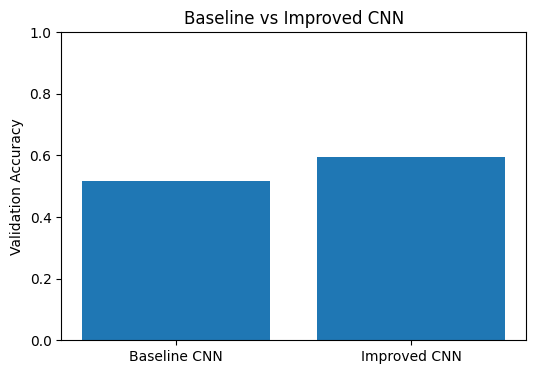

In [8]:
#Accuracy bar graph
models = ["Baseline CNN", "Improved CNN"]
accuracies = [baseline_acc, improved_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Validation Accuracy")
plt.title("Baseline vs Improved CNN")
plt.ylim(0, 1)
plt.show()

In [9]:
#Parameter comparison
print("Baseline parameters :", baseline_model.count_params())
print("Improved parameters :", improved_model.count_params())

Baseline parameters : 3306059
Improved parameters : 4587723
